# Let's import modules that we need

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Now, let's make data, generate synthetic data using a Hamiltonian.
# Here, I simulate a qubit using the Pauli matrices. 
# The initial state is |0>, and the time evolution is given by e^(-iHt), where H is the Hamiltonian and t is the time.

In [13]:
# Let's define the Pauli matrices

sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

In [14]:
# Let's define the Hamiltonian

H = np.pi/2 * (sigma_x + sigma_y)

In [15]:
# Again let's define the initial state
psi_0 = np.array([[1], [0]])

# Also again let's define the time range
t = np.linspace(0, 1, 100)

In [16]:
# Compute the time evolution using the Schrödinger equation
psi_t = np.zeros((len(t), 2, 1))
psi_t[0] = psi_0
for i in range(1, len(t)):
    dt = t[i] - t[i-1]
    U = np.eye(2) - 1j * H * dt
    psi_t[i] = np.dot(U, psi_t[i-1])

# Normalize and scale the input features
psi_t_norm = psi_t/np.max(np.abs(psi_t))

C:\Users\gamea\AppData\Local\Temp\ipykernel_6928\1263289536.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_t[i] = np.dot(U, psi_t[i-1])


# And finaly, our data

In [17]:
X = psi_t_norm[:-1]
y = psi_t_norm[1:]

# And let's split our data into training and testing sets

In [18]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# I decided to use RNN with LSTM because it is designed to handle sequential data and can capture dependencies over time.

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='linear')
])

model.compile(loss='mse', optimizer='adam')


history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Let's evaluatethe model
y_pred = model.predict(X_test)

model.fit(X, y)

# Predicting of state amplitudes for the entire time interval
y_pred = model.predict(X)

Epoch 1/100
5/5 - 12s - loss: 0.4668 - val_loss: 0.4679 - 12s/epoch - 2s/step
Epoch 2/100
5/5 - 0s - loss: 0.4265 - val_loss: 0.4400 - 128ms/epoch - 26ms/step
Epoch 3/100
5/5 - 0s - loss: 0.3820 - val_loss: 0.4088 - 109ms/epoch - 22ms/step
Epoch 4/100
5/5 - 0s - loss: 0.3374 - val_loss: 0.3743 - 110ms/epoch - 22ms/step
Epoch 5/100
5/5 - 0s - loss: 0.2825 - val_loss: 0.3369 - 109ms/epoch - 22ms/step
Epoch 6/100
5/5 - 0s - loss: 0.2197 - val_loss: 0.2982 - 109ms/epoch - 22ms/step
Epoch 7/100
5/5 - 0s - loss: 0.1573 - val_loss: 0.2619 - 108ms/epoch - 22ms/step
Epoch 8/100
5/5 - 0s - loss: 0.1126 - val_loss: 0.2349 - 108ms/epoch - 22ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0737 - val_loss: 0.2254 - 108ms/epoch - 22ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0705 - val_loss: 0.2320 - 107ms/epoch - 21ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0750 - val_loss: 0.2417 - 110ms/epoch - 22ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0719 - val_loss: 0.2485 - 102ms/epoch - 20ms/step
Epoch 13/100
5/5 - 0s - loss

4/4 [==============================] - 0s 5ms/step


# Plot the results

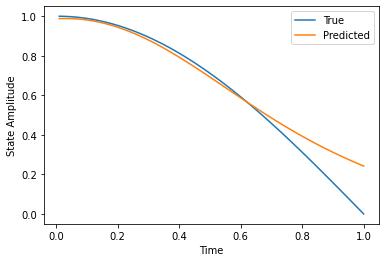

In [20]:
plt.plot(t[1:], psi_t[1:, 0, 0], label='True')
plt.plot(t[1:], y_pred[:, 0], label='Predicted')

plt.xlabel('Time')
plt.ylabel('State Amplitude')
plt.legend()
plt.show()